# Offline Interactive Plotting with Python in 2021

I recently had a small visualization that I wanted to do: Given a 3D stack of images, make a plot of the images with the ability to interactively flip through back and forth. Also, I wanted to be able to have it work on a static site like Github Pages.

This seems like any good, popular programming language would be able to do this, but many of the web-based visualizations are written with Javascript... and I didn't want to learn more javascript if it wasn't necessary.
Also, my search was pretty specifically towards images and geospatial data. If you just want some bar graphs with sliders, theres a bunch of ways to do that ([Altair](https://altair-viz.github.io/) is probably the easiest to make work in a static page).

But for those like me, and the others asking the [same](https://stackoverflow.com/questions/22739592/how-to-embed-an-interactive-matplotlib-plot-in-a-webpage) [questions](https://stackoverflow.com/questions/39334338/jupyter-embed-live-interactive-widgets), here's what I found.




## Final choices:

To skip all the searching I did, here are the winners for me:

- Best for 2d: [HoloViews](holoviews.org)
    - Very simple for working with stacks of images.
    - Easy to save offline in a static HTML embedding.
    - Pretty intuitive if you've gotten into xarray already (like, really into it. It still took me a least an hour to figure out the example below with moderate familiarity).
- Best for 3d: [ipyvolume](https://ipyvolume.readthedocs.io/en/latest/?badge=latest)
    - Uses ipywidgets, threejs, webgl, and other cool Javascript libraries so you don't have to.
    - Still makes it easy to save offline (although it will have a large .html file size)


### The "not-quites"

Here's the notes I made about the others attempted along the way, and why they didn't work for my case (if I missed something obvious and easy here, I'd be happy to hear how):

- Matplotlib (with ipywidgets)
    - First one I tried, since I plot everything normally with this. Works super easily doing something with [ipywidgets, like this](https://stackoverflow.com/questions/44329068/jupyter-notebook-interactive-plot-with-widgets), but it doesn't work in a static page away from the Jupyter kernel, since it runs python on each interaction update. All the examples online wanted you to use things like:
    - [binder](https://mybinder.org/) (as a backend)
        - Lots of positive mentions, but the examples take 60+ seconds to load the kernel.... By then, I've lost interest even my own example. For a simple slider, it shouldn't take that much. It certainly works better for a full learning environment.
    - [Viola](https://voila.readthedocs.io/en/stable/index.html)
        - Like binder, but being run by Jupyter. Still, I just want to slide through some images, I don't need a full Python kernel running.
- [Plotly](https://plotly.com/python/)
    - It's probably possible? They certainly didn't make it easy for my simple use case of images and/or 3D plotting 
- [Bokeh](https://bokeh.org/)
    - Hard on it's own... but used as a backend for others like HoloViews
- ([Altair](https://altair-viz.github.io/)
    - Doesn't seem to cater to image plotting at all, wants tabular data
- [bqplot](https://bqplot.readthedocs.io/en/latest/introduction.html#goals)
    - Like altair: doesn't want images, wants tabular data
- [mayavi](http://docs.enthought.com/mayavi/mayavi/)
    - Really heavy and doesn't seem to save offline. Probably great for live explorations.
- [mpld3](http://mpld3.github.io/examples/index.html)
    - Image support is weak, no showing interacting offline


I'll show the example I was using as a demonstration, and hopefully it's easy enough to translate to any other 3D image stack.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from numpy.fft import fft2, ifft2, fftshift

%matplotlib notebook

Here I was playing around with creating [Gaussian random fields](https://garrettgoon.com/gaussian-fields/). These are using in cosmology to describe the distribution of stars/galaxies in the universe, but also work as a way to simulate turbulence in the atmosphere.

It turns out that theres a relatively simple way and [fast way to generate this random field](https://mathematica.stackexchange.com/questions/4829/efficiently-generating-n-d-gaussian-random-fields):

- Generate some white noise
- rescale the Fourier transform of the noise so that the power spectrum is a power law: $P(k) \propto k^{-\beta} $
- then take the IFFT:

In [2]:
def power_law(k, beta):
    # condition, true replacement, false replacement
    with np.errstate(divide="ignore"):
        return np.where(k > 0, k ** (-beta), 0.0)


def make_gaussian_field(Nsize, beta=3, seed=None):
    if seed is not None:
        np.random.seed(seed)
    white_noise = np.random.uniform(size=(Nsize, Nsize))
    w_hat = fft2(white_noise)
    idxs = np.concatenate((np.arange(Nsize / 2 + 1), np.arange(-Nsize / 2 + 1, 0)))
    ka = 2 * np.pi / Nsize * idxs[:, np.newaxis]
    karr = np.sqrt(ka ** 2 + ka.T ** 2)
    P = np.sqrt(power_law(karr, beta))

    Phi = w_hat * P
    return ifft2(Phi).real

I wanted to try and see how the $\beta$ parameter affected the generated noise visually, so I made a stack of these with increasing $\beta$:

In [12]:
beta_range = np.arange(0, 3.5, 0.5)
phi_stack = np.array([make_gaussian_field(100, beta, seed=0) for beta in beta_range])
print(f"Image stack: {phi_stack.shape = }")

Image stack: phi_stack.shape = (7, 100, 100)


Plotting one of these images is easy enough with Matplotlib:

<IPython.core.display.Javascript object>


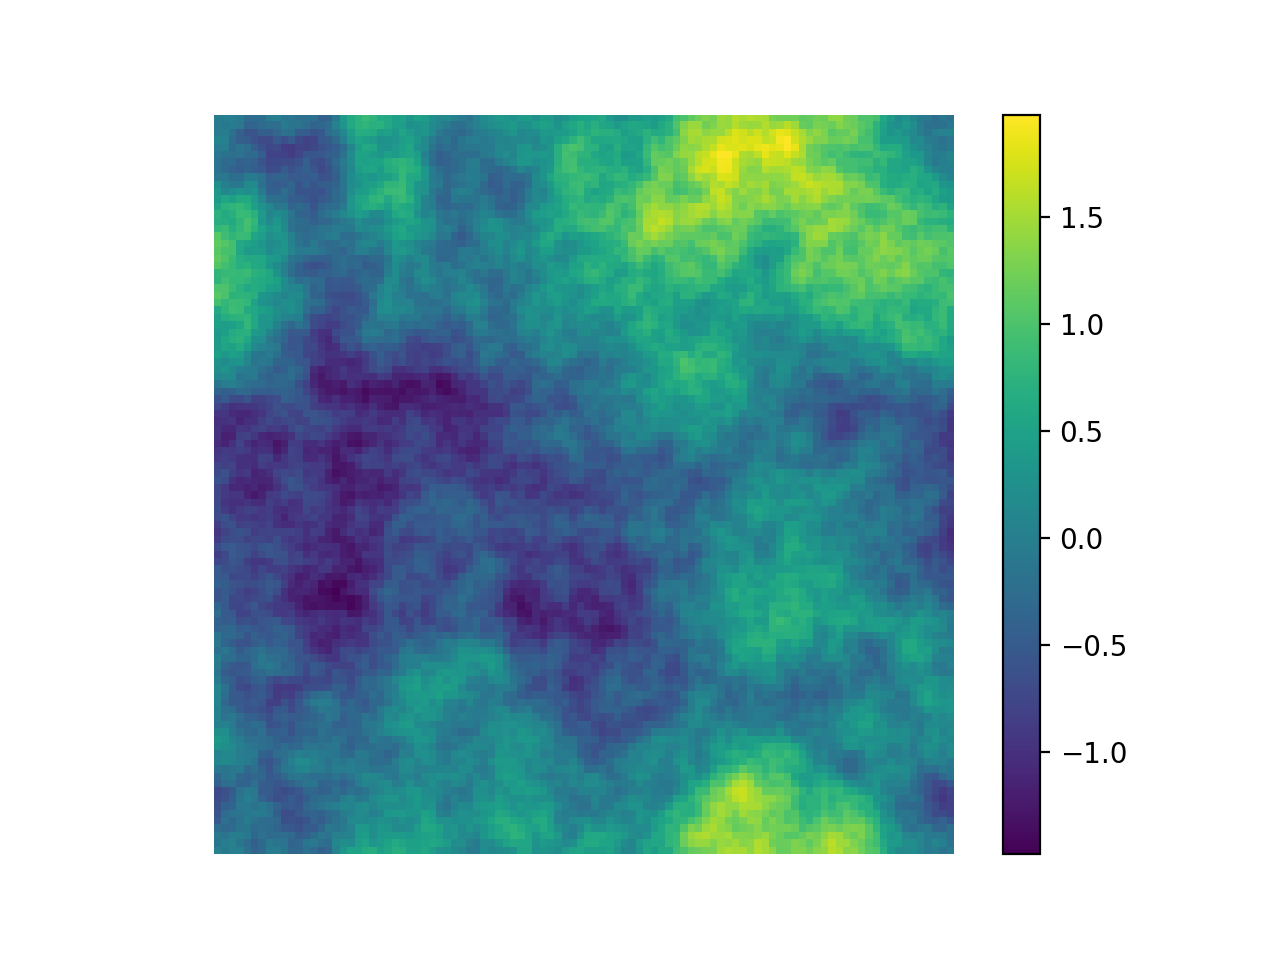

In [13]:
plt.close()
fig, ax = plt.subplots()
phi = phi_stack[-1]
axim = ax.imshow(phi)
fig.colorbar(axim, ax=ax)
plt.axis("off")
plt.show()

So now I've got my image stack, here's how I got it nicely visualized all of them.

# 2D gridded data: Images with sliders


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
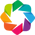

In [14]:
import holoviews as hv
from holoviews import opts
import xarray as xr

hv.extension("bokeh", "matplotlib")

opts.defaults(
    opts.GridSpace(shared_xaxis=True, shared_yaxis=True),
    opts.Image(cmap="viridis", width=400, height=400),
    opts.Labels(
        text_color="white",
        text_font_size="8pt",
        text_align="left",
        text_baseline="bottom",
    ),
    opts.Path(color="white"),
    opts.Spread(width=600),
    opts.Overlay(show_legend=False),
)

In [15]:
# Make a subset that is uneven so you can distiguish the dimensions:
p1 = phi_stack[:, :-10, :-20]
print(p1.shape)

xrphi = xr.Dataset(
    data_vars={"phi": (["beta", "y", "x"], p1)},
    coords={
        "beta": beta_range,
        "y": np.arange(p1.shape[1]),
        "x": np.arange(p1.shape[2]),
    },
)
xrphi

(7, 90, 80)


<xarray.Dataset>
Dimensions:  (beta: 7, x: 80, y: 90)
Coordinates:
  * beta     (beta) float64 0.0 0.5 1.0 1.5 2.0 2.5 3.0
  * y        (y) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * x        (x) int64 0 1 2 3 4 5 6 7 8 9 10 ... 70 71 72 73 74 75 76 77 78 79
Data variables:
    phi      (beta, y, x) float64 0.05235 0.2187 0.1063 ... 0.9273 0.5682 0.4145

Now what HoloViews needs is it's own `Dataset`. Luckily, it's integrated well-enough with xarray that you can just pass it in to create it.


In [17]:
phids = hv.Dataset(xrphi)
phids

:Dataset   [beta,y,x]   (phi)

The only extra information you need to pass to the `Image` constructor is the `kdims`, or the "Key" dimenions: which is the x (horizontal) dimension, and which is the y (vertical). The other dimensions will get gobbled up and become a slider on the "HoloMap".

If you've got two dimensions named 'x' and 'y', it can interpret this automatically, but being explicit is nice:

In [18]:
imnoise = phids.to(hv.Image, kdims=["x", "y"])
imnoise

:HoloMap   [beta]
   :Image   [x,y]   (phi)

This is a very nice version of what I was looking for, especially given how many lines of code it took.
BUT, the final test was whether it was easy to output an HTML snippet that will work offline, or whether that's another huge obstacle.

Luckily, it was this simple:


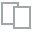
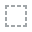
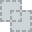
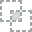
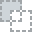
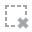
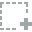
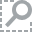
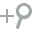
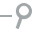
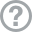
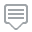
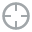
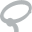
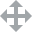
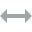
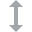
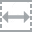
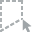
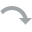
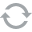
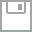
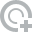
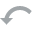
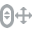
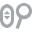
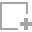
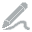
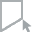
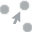
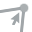
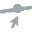

In [20]:
renderer = hv.renderer("bokeh")
# Using renderer save
outname = "test_holo.html"
# Unclear why it must append .html...
renderer.save(imnoise, outname.replace(".html", ""))

from IPython.core.display import HTML

# Now we can load it here, or insert it anywhere as an embedding:
with open(outname) as f:
    wt = f.read()
HTML(wt)

Though it took many hours of search and trying differeny library examples, I'm sold after I found this. 
It was exactly what I wanted from the start, needed very few lines of code to get a working version, and the integration with `xarray` is an added bonus.
They even have a further extension for other geospatial data with [GeoViews](http://geoviews.org), which I'll keep my eye on for more complicated mapping plots.

# 3D Surface example

While my use case here is definitely better as a 2D slider, I originally wanted to see it as a 3D surface.

In [24]:
import ipyvolume as ipv
from ipywidgets import VBox

Kx, Ky = np.meshgrid(np.arange(phi_stack.shape[2]), np.arange(phi_stack.shape[1]))

# Make a colormap proportional to height
colormap = cm.coolwarm
znorm = phi - phi.min()
znorm /= znorm.ptp()
znorm.min(), znorm.max()
color = colormap(znorm)

Ipyvolume made this nearly as easy as using Matplotlib's 3D plotting, but it was much better viewing manipulation thanks to the other libraries it uses:

In [25]:
ipv.figure()
mesh = ipv.plot_surface(Kx, Ky, phi_stack, color=color[..., :3])
ipv.animation_control(mesh)  # shows controls for animation controls


vb = VBox([ipv.gcc()])
# ipv.show() # Other way to show in notebooks
vb

While this is still pretty cool, I think I was over eager to think my plots needed to be 3D.

Like HoloViews, ipyvolume also makes it easy to save as an HTML embedding:

In [27]:
outname = "widget1.html"
ipv.embed.embed_html(outname, [vb])

# Now load the snippet we just saved to show it works as a standalone
with open(outname) as f:
    wt = f.read()
HTML(wt)